# **一. 必做部分**

## **1.** **复现课件中线性 SVM、决策树、朴素贝叶斯分类的示例。**




### **1.1 代码**

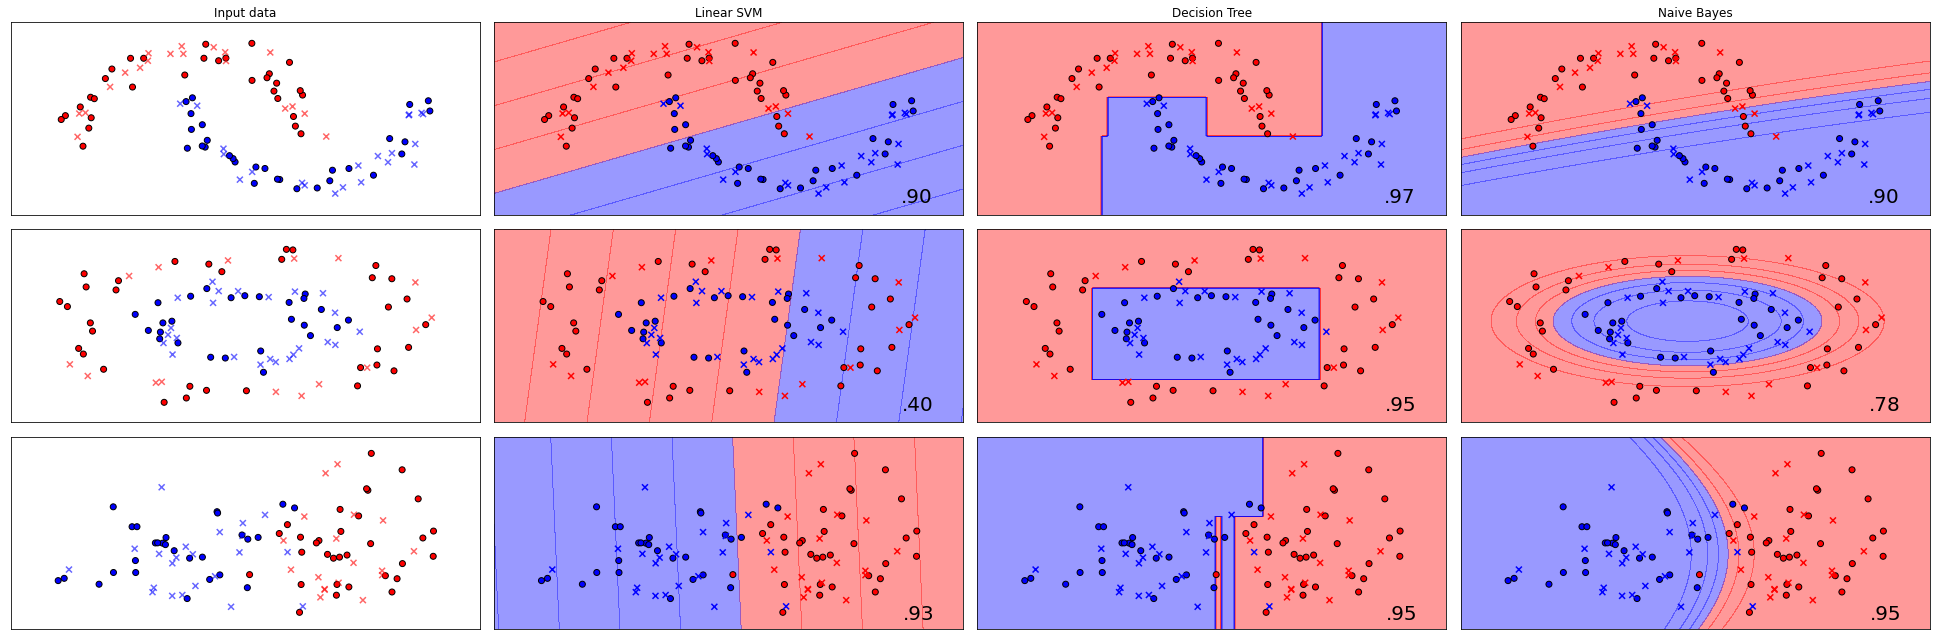

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    # ax.legend(loc=2) 
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        # ax.legend(loc=2) 
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### **1.2 说明**

本代码复现了课件中线性SVM、决策树、朴素贝叶斯分类的示例

## **2. 设置支持向量分类器的惩罚为0.05**

### **2.1 代码**

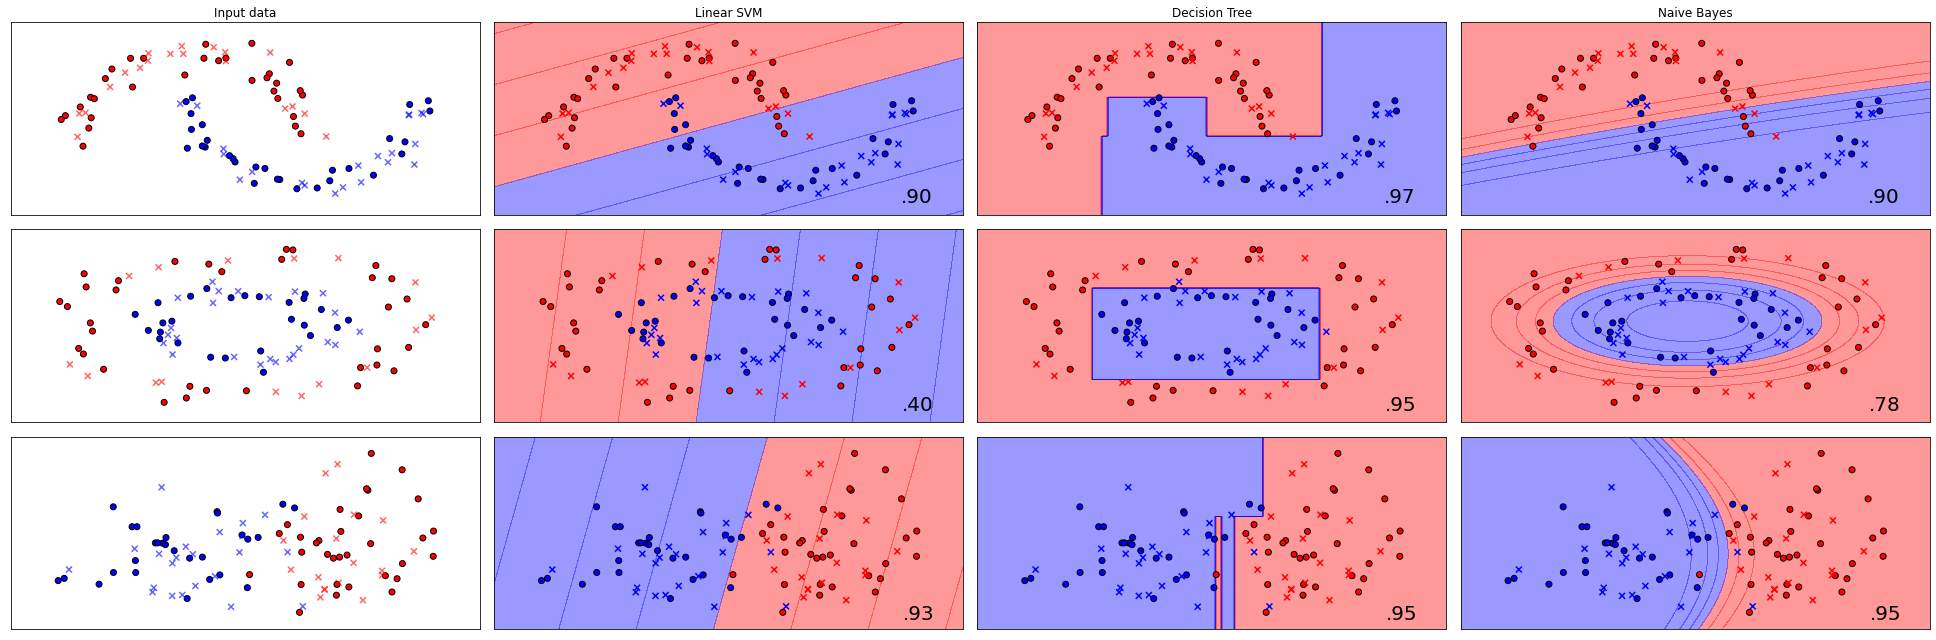

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.05),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### **2.2 说明**

本代码将 SVC(kernel="linear",C=0.025)中的C修改为0.05。

## **3. 对朴素贝叶斯分类器的先验概率进行设定（可随机设定）**

### **3.1 代码**

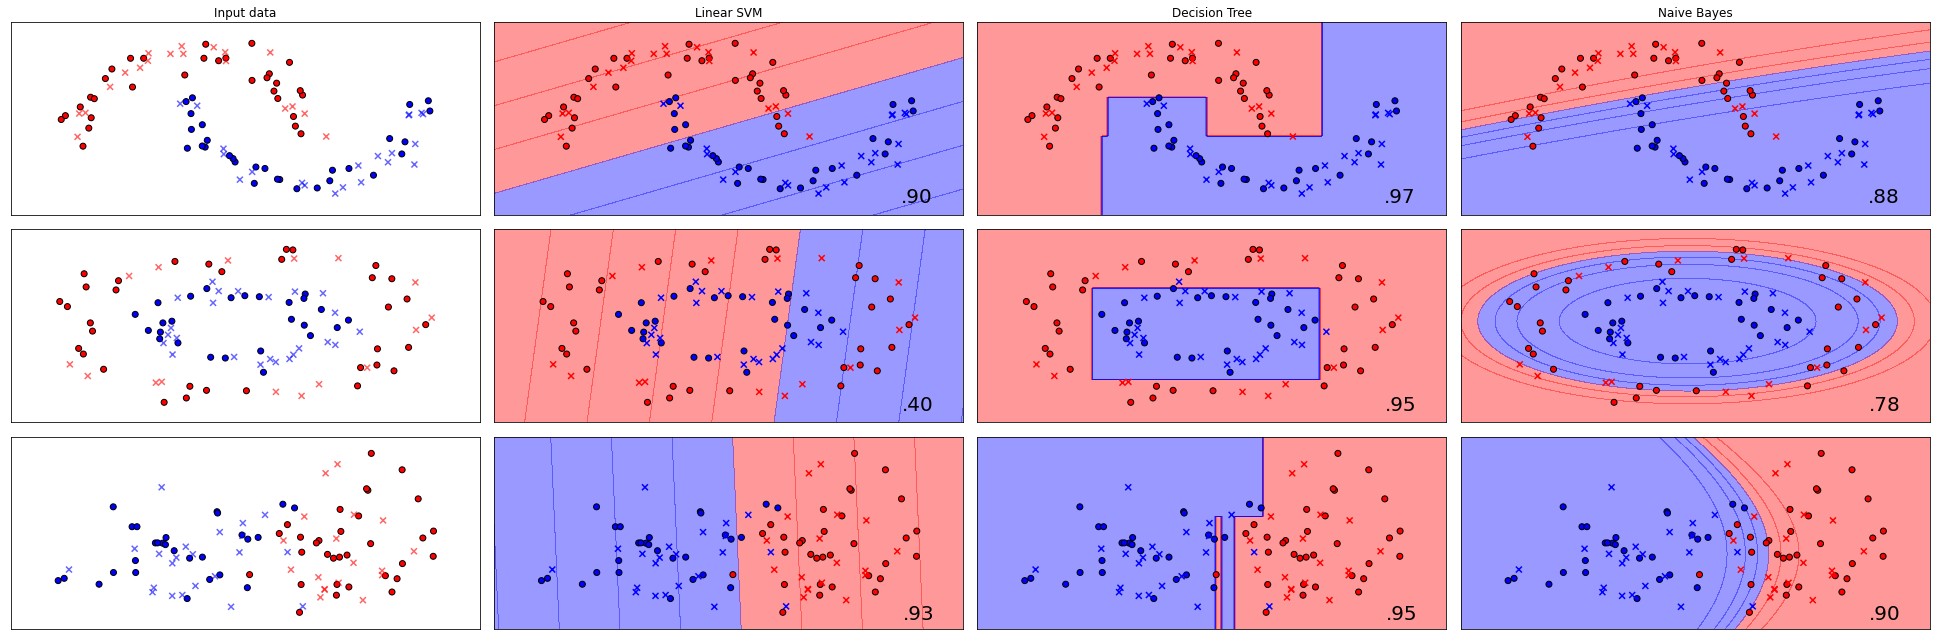

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB(priors=[0.1, 0.9])]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### **3.2 说明** 

本代码在GaussianNB()中增加了参数priors=[0.1, 0.9]，变为GaussianNB(priors=[0.1, 0.9])

## **4. 在每张结果图上展示图例**

### **4.1 代码**

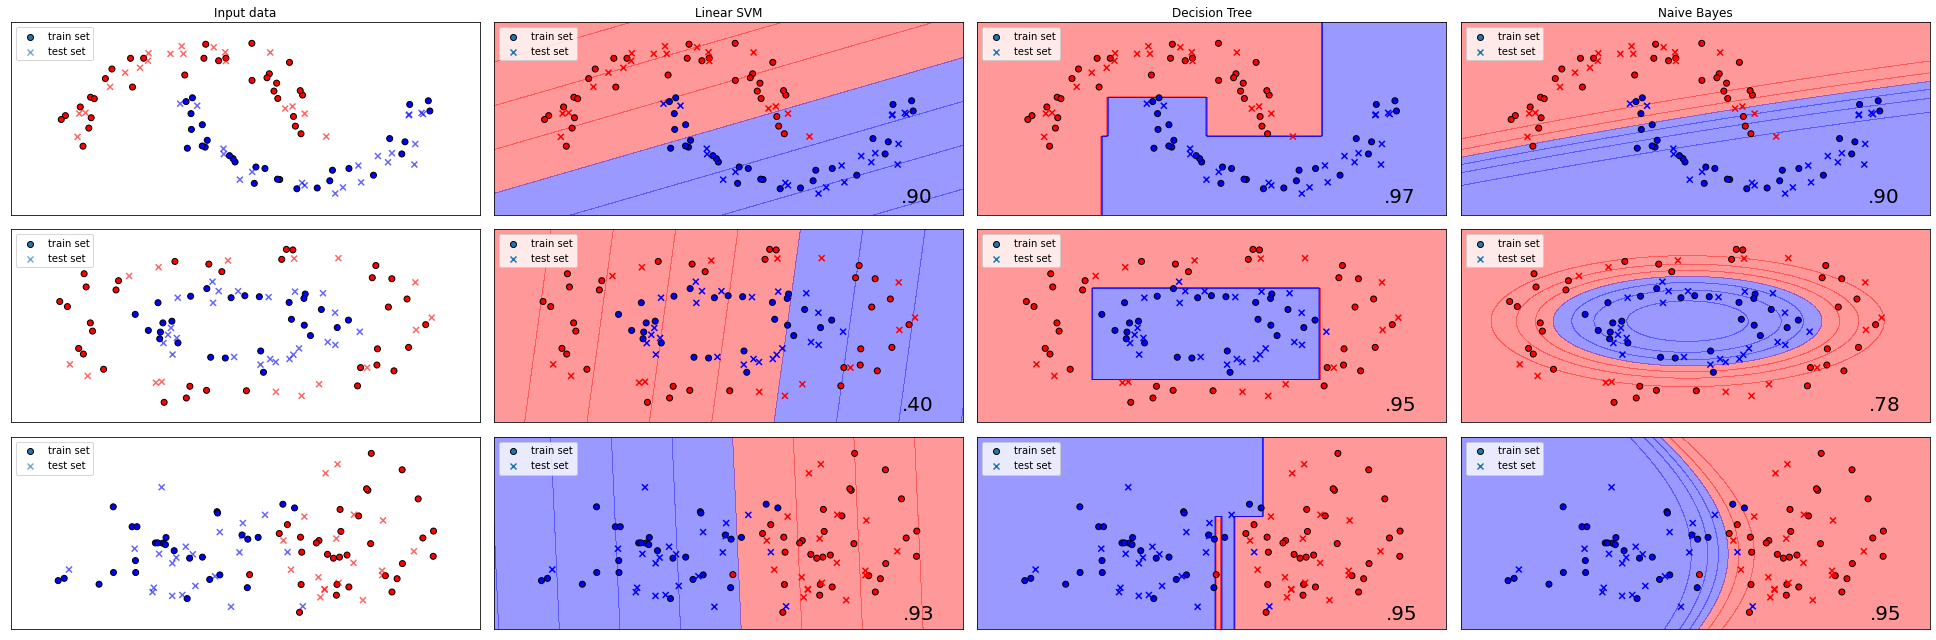

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc=2) 
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc=2) 
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### **4.2 说明**

本代码在课件代码中增加了ax.legend(loc=2)，输出的结果为每张图的左上角添加了图例。

## **5. 修改散点颜色为黄和绿**

### **5.1 代码**

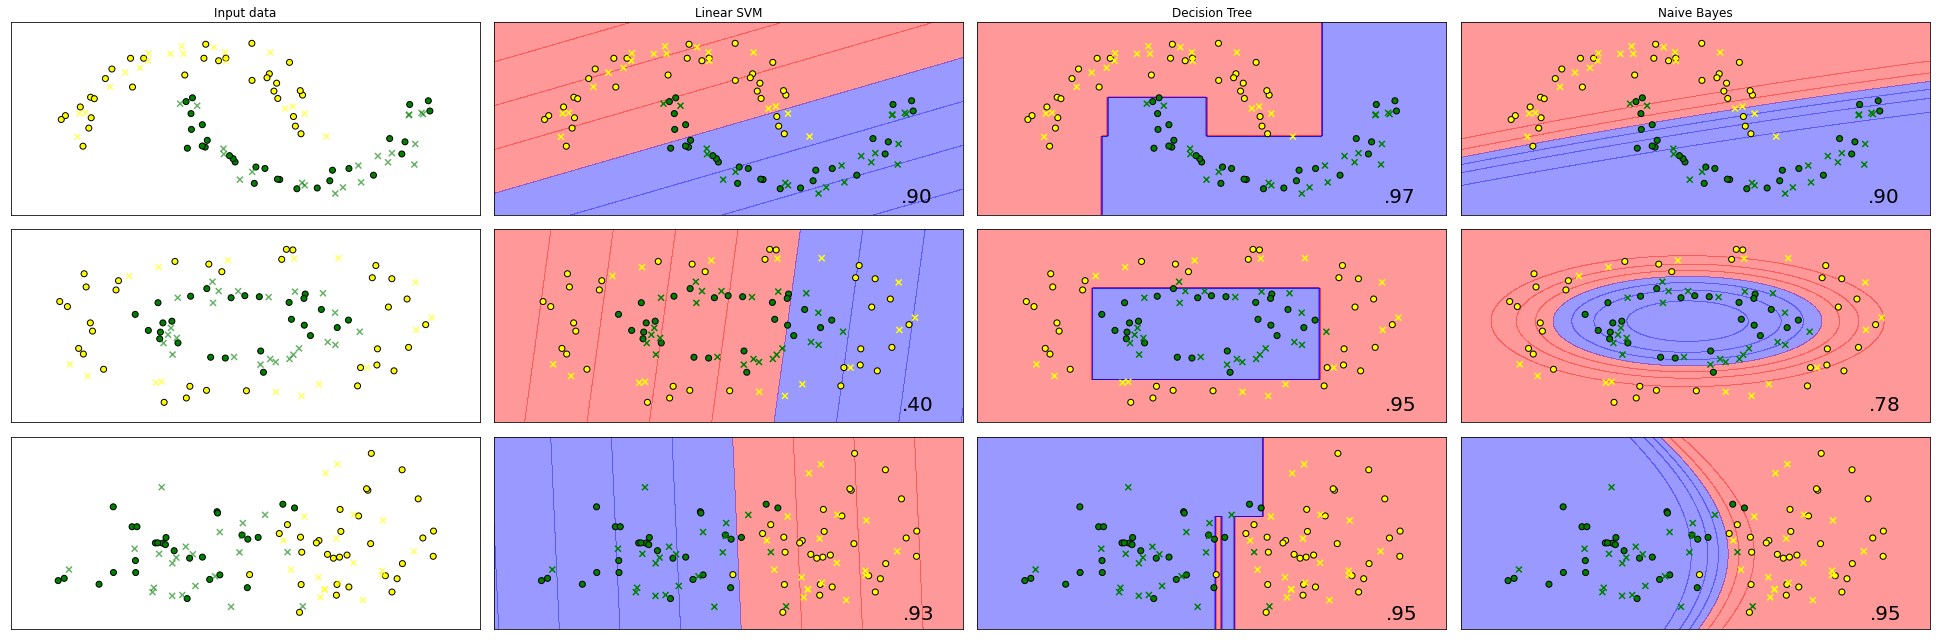

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FFFF00','#008000'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### **5.2 说明**

本代码将cm_bright=ListedColormap(['#FF0000','#0000FF'])修改为cm_bright=ListedColormap(['#FFFF00','#008000'])，实现了将散点颜色修改为黄和绿

## **6. 测试结果的正确率保留三位小数展示**

### **6.1 代码**

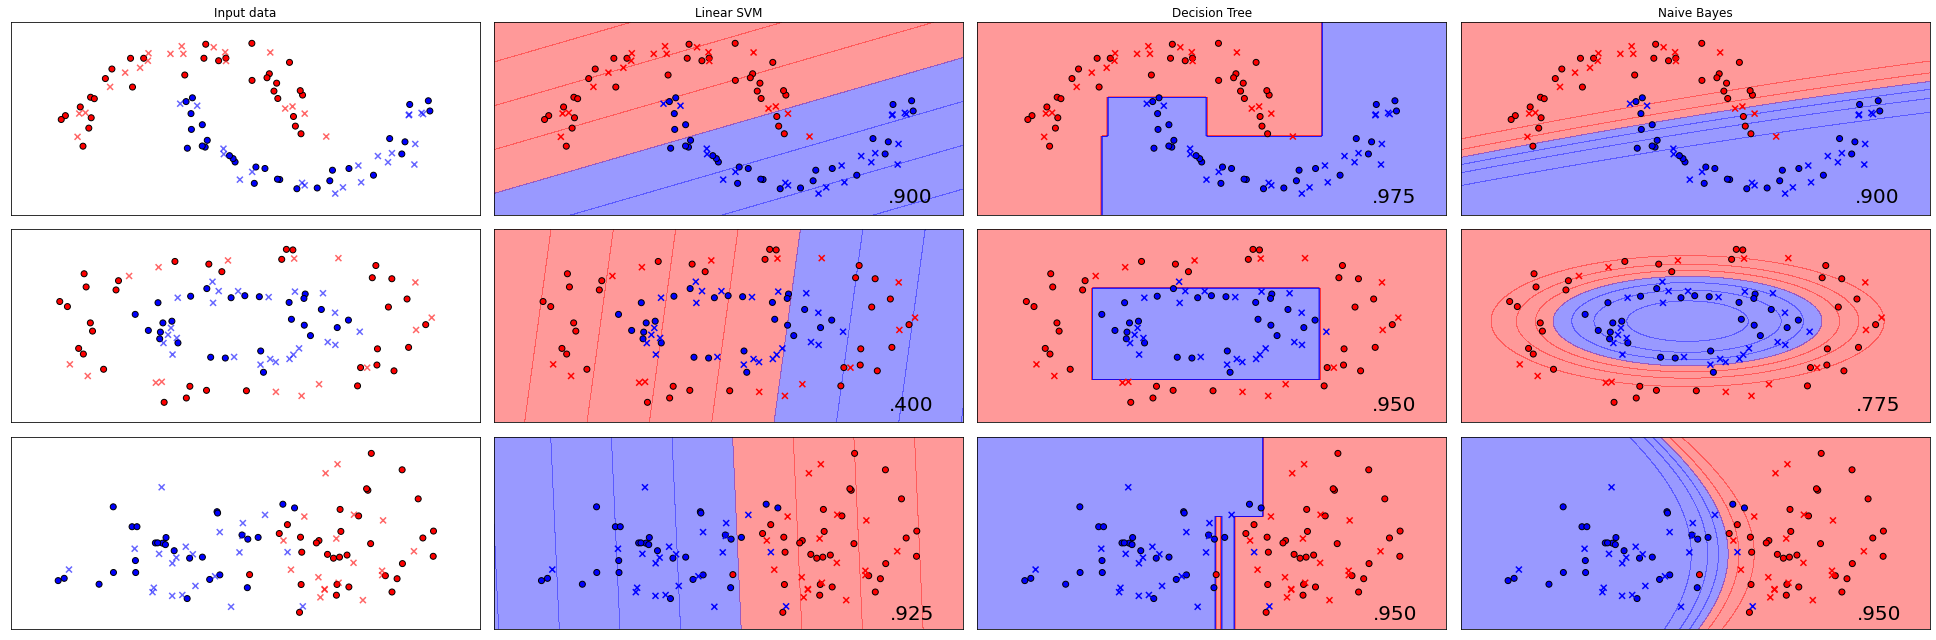

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### **6.2 说明**

本代码将ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0')修改为ax.text(xx.max() - .3, yy.min() + .3, ('%.3f' % score).lstrip('0')，实现了将测试结果的正确率保留三位小数展示。

# **二. 创新与拓展**

## **1. 自主选取其他的数据集，采用上述三类分类器进行分类，展示分类结果**

### **1.1 代码**

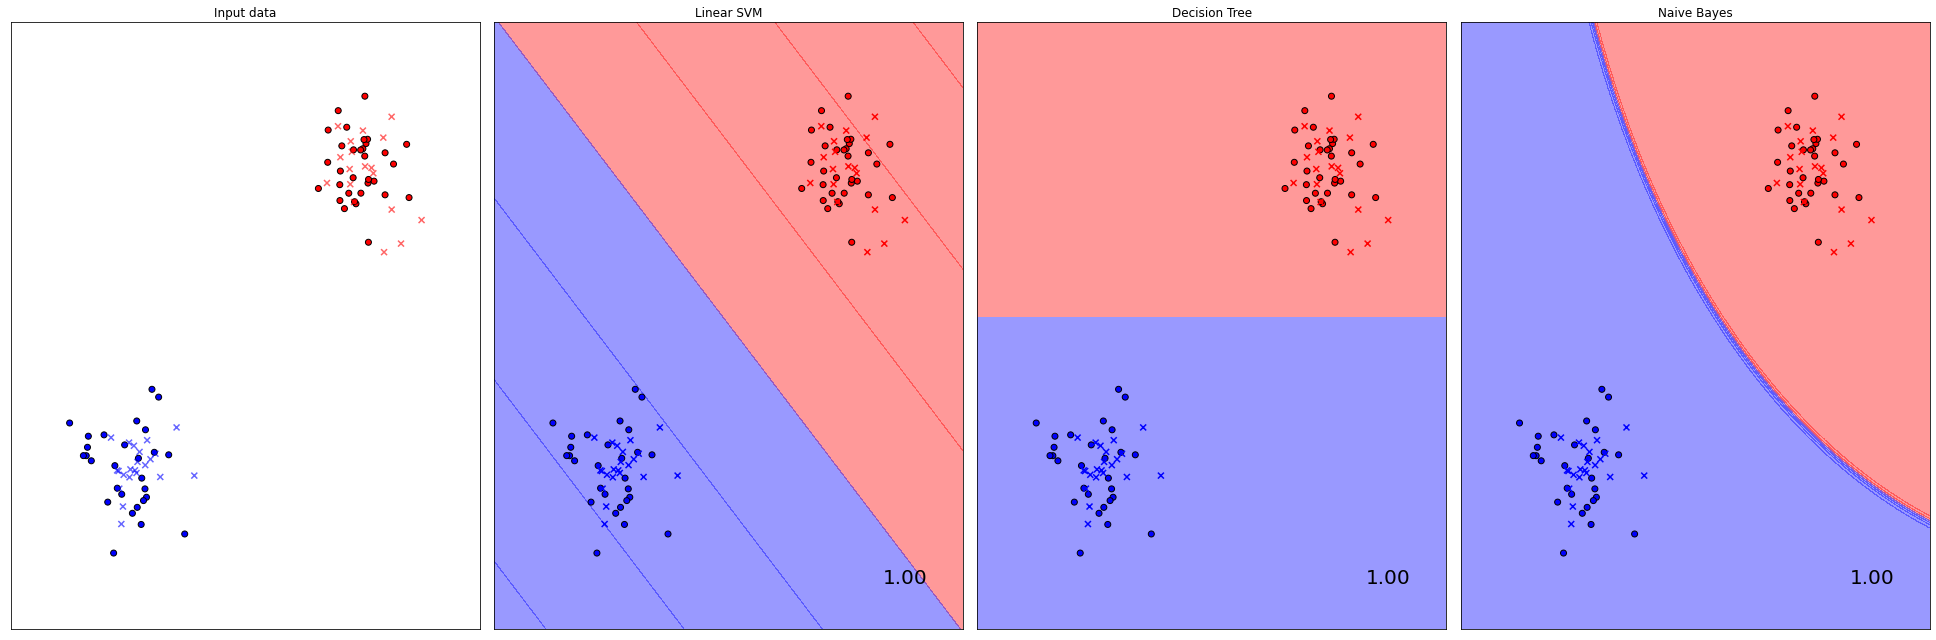

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification, make_blobs

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_blobs(n_features=2,centers=2,random_state=1)]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### **1.2 说明**

本代码采取了sklearn.datasets中的make_blobs数据集，并采取上述三类分类器进行分类，展示了分类结果

## **2. 探究分类器的参数对于分类结果的影响并进行文字分析**

### **2.1 DecisionTreeClassifier(max_depth=5)中max_depth设置对于结果的影响（如过拟合或者欠拟合）**


#### **2.1.1 代码**

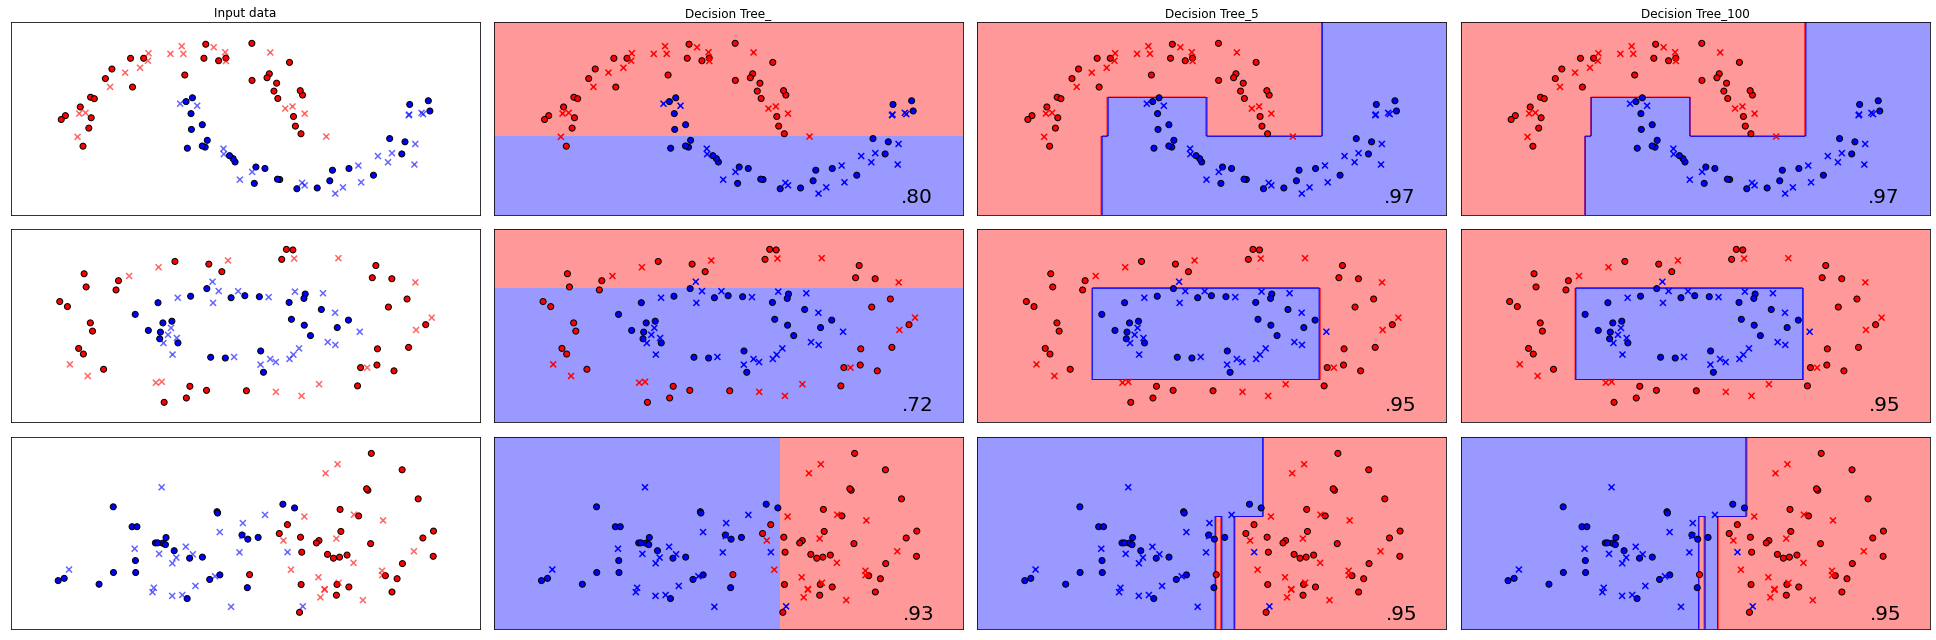

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Decision Tree_1","Decision Tree_5","Decision Tree_100"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[DecisionTreeClassifier(random_state=0, max_depth=1),DecisionTreeClassifier(random_state=0, max_depth=5),DecisionTreeClassifier(random_state=0, max_depth=100)]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

#### **2.1.2 说明**

为了探究分类器的参数对于分类结果的影响，本代码将课件例程中的三个分类器修改为以下三种：
  - DecisionTreeClassifier(random_state=0, max_depth=1)
  - DecisionTreeClassifier(random_state=0, max_depth=5)
  - DecisionTreeClassifier(random_state=0, max_depth=100)

即最大深度分别为1、5、100的三个决策树，并输出了分类结果。

max_depth的大小会对分类结果产生影响，max_depth越小，越容易出现欠拟合，max_depth越大，越容易出现过拟合

### **2.2 朴素贝叶斯分类器的先验概率修改对于分类的影响**

#### **2.2.1 代码**

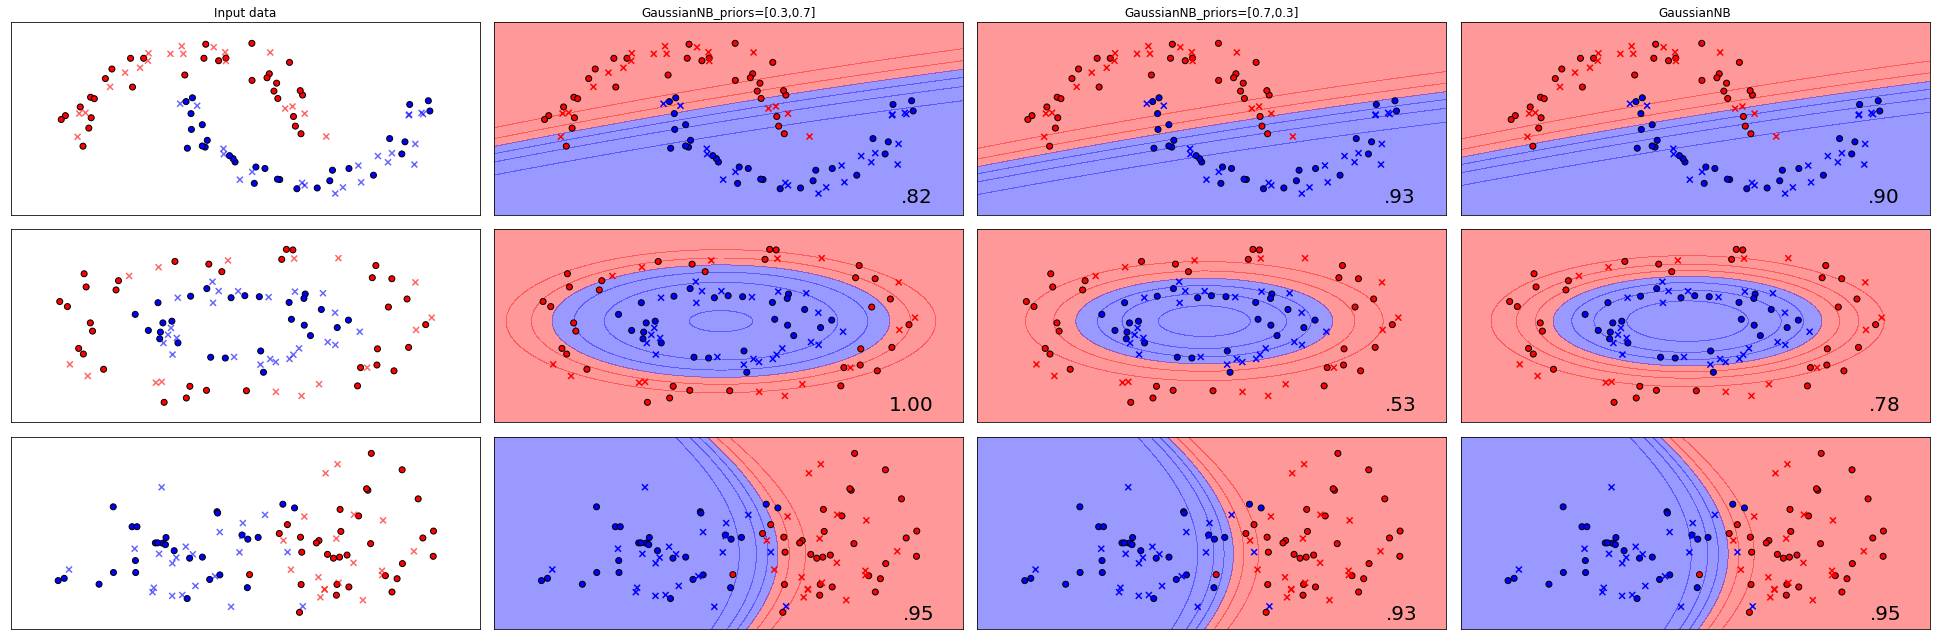

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["GaussianNB_priors=[0.3,0.7]","GaussianNB_priors=[0.7,0.3]","GaussianNB"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[GaussianNB(priors=[0.3,0.7]), GaussianNB(priors=[0.7,0.3]), GaussianNB()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

#### **2.2.2 说明**

为了探究朴素贝叶斯分类器的先验概率修改对于分类的影响，本例程将课件中的三个分类器修改为以下三种：
  - GaussianNB(priors=[0.3,0.7])
  - GaussianNB(priors=[0.7,0.3])
  - GaussianNB()

即先验概率分别为[0.3,0.7]、[0.7,0.3]和默认先验概率的三个朴素贝叶斯分类器，并输出了分类结果。

从结果可以看出。当先验概率不同时，分类效果会有变化。因此，对数据进行分类时，设置合适的先验概率，可以提高分类的正确率。

### 2.3 支持向量分类器不同核函数对于结果的影响

#### 2.3.1 代码

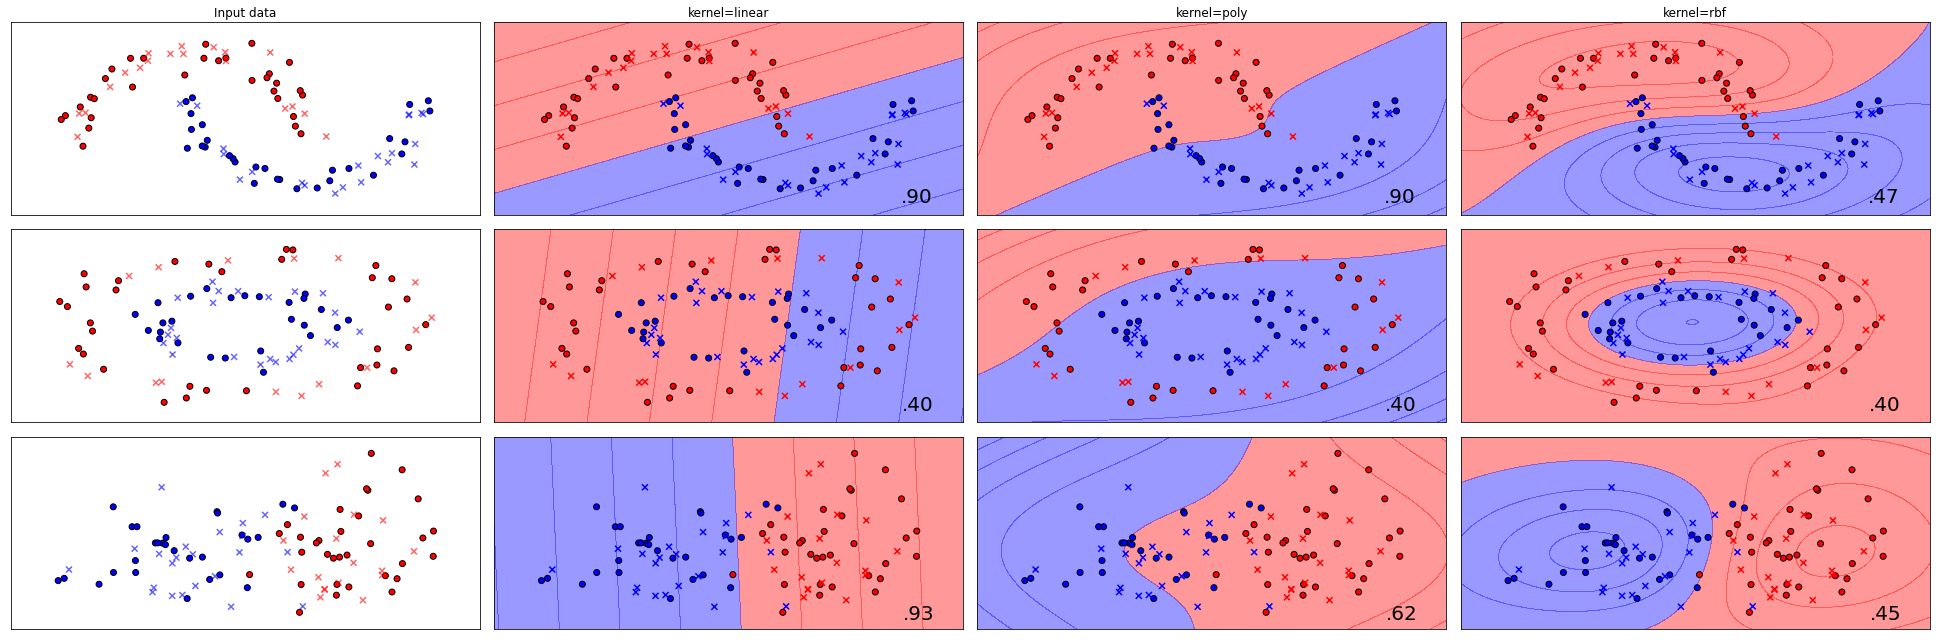

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["kernel=linear","kernel=poly","kernel=rbf"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[SVC(kernel="linear",C=0.025),SVC(kernel="poly",C=0.025),SVC(kernel="rbf",C=0.025)]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

#### 2.3.2 说明

为了探究支持向量分类器不同核函数对结果的影响，本程序将课件中的三个分类器修改为以下三种：
  - SVC(kernel="linear",C=0.025)
  - SVC(kernel="poly",C=0.025)
  - SVC(kernel="rbf",C=0.025)

即核函数分别为"linear"、"poly"和"rbf"的三个支持向量机分类器，并输出了分类结果。

从结果可以看出，所选的核函数不同，分类效果也会有所不同。因此，对数据进行分类时，选择合适的核函数可以提高分类的正确率。

### 2.4 参数不限制于课件中代码所用到的参数，可以探究其他的参数

#### 2.4.1 代码

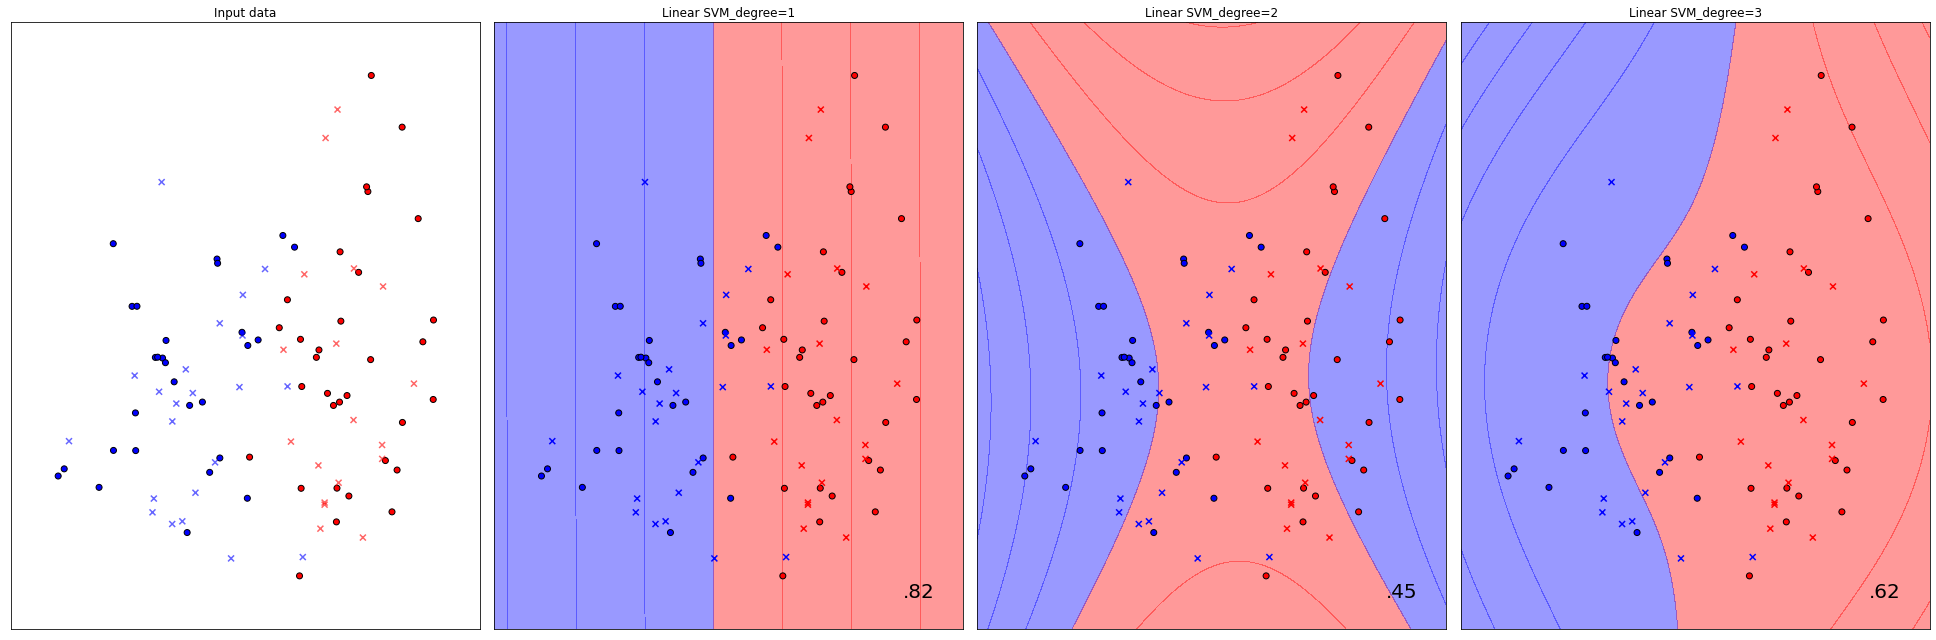

In [18]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM_degree=1","Linear SVM_degree=2","Linear SVM_degree=3"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="poly",C=0.025, degree=1),
    SVC(kernel="poly",C=0.025, degree=2),
    SVC(kernel="poly",C=0.025, degree=3)]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[linearly_separable]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

#### 2.4.2 说明

本代码探究了SVC()函数中，degree参数对分类结果的影响.通过查阅资料，我了解到degree参数只对多项式核函数有用，是指多项式核函数的阶数n。我将课件中的代码里的三个分类器修改为了如下三种：
  - SVC(kernel="poly",C=0.025, degree=1)
  - SVC(kernel="poly",C=0.025, degree=2)
  - SVC(kernel="poly",C=0.025, degree=3)

从输出结果我们可以看出，所设的degree的值不同，分类效果也会有所不同。因此，对数据进行分类时，选择适当的degree可以提高分类的正确率。

## 3. 其他分类方法的效果的对比分析（K近邻）

### 3.1 代码

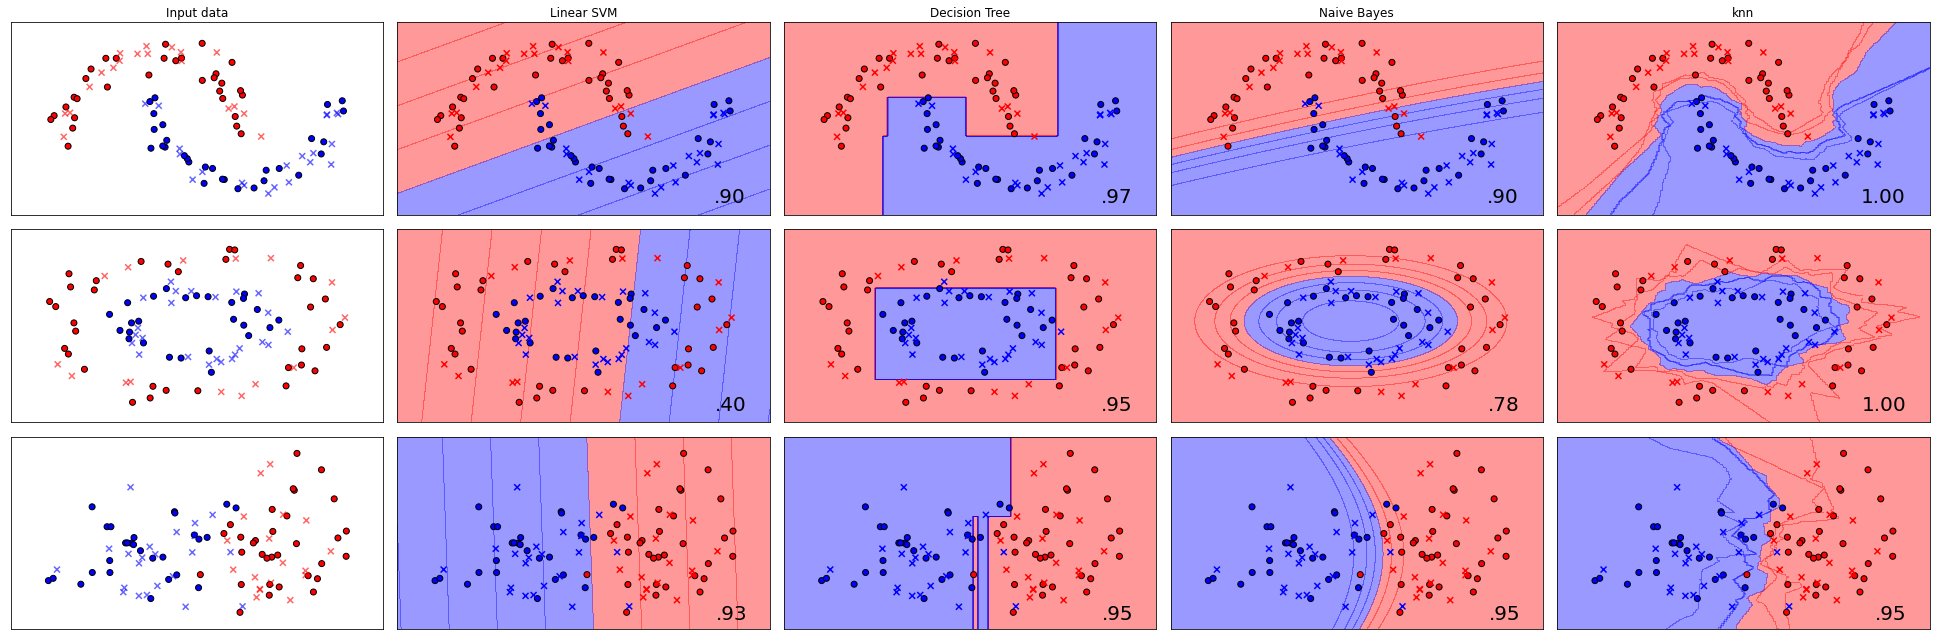

In [ ]:
# 导入包
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

# 导入三类分类器
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器
from sklearn.neighbors import KNeighborsClassifier

# 设置分类器参数
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes","knn"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    DecisionTreeClassifier(random_state=0, max_depth=5),
    GaussianNB(),
    KNeighborsClassifier()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集

#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(27,9))
i=1

#分别对每个数据集做训练及测试
for ds_cnt,ds in enumerate(datasets):
    #处理数据集
    X,y=ds
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=\
        train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面
    if ds_cnt==0:
        ax.set_title("Input data")
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    # 分别对每个分类器做训练测试
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)  # 训练集训练分类器
        score = clf.score(X_test, y_test)  # 测试集测试分类器

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        # 分类结果用等高线函数画出
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
        # 画训练集点
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k', marker='o', label='train set')
        # 画测试集点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', marker='x', label='test set')
        # 画坐标轴
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            # 画子图标题
            ax.set_title(name)
            # 显示测试正确率
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=20, horizontalalignment='right')
        i += 1
plt.tight_layout()
plt.show()

### 3.2 说明

本程序在课件所给代码中的三个分类器中，增加了一个knn分类器。从结果可以看出，knn分类器的分类效果要优于前三种分类器。